# Women, Business & Law
Measuring gender equality globally

WBL 2020 is the sixth in the series of biannual reports measuring gender differences in the law. In 2019 a study was released which piloted a new index that aggregates 35 data points across 8 scored indicators. The WBL index scores are based on the average of each economy’s scores for the 8 topics included in this year’s aggregate score. A higher score indicates more gender equal laws. The dataset was expanded in 2020 to include historical information dating back to 1970. This file contains Women, Business and the Law (WBL) data for 190 economies for 1970 to 2019 (reporting years 1971 to 2020). 

For more information about the methodology for data collection, scoring and analysis, visit http://wbl.worldbank.org.

This data source is so rich that enalbes multiple approaches of analysis, so I decided to reuse it for this week's assignment. 

# Setup

In [1]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import fill
from matplotlib.cbook import boxplot_stats
%matplotlib inline

In [2]:
# load data using pandas
wbl_data = pd.read_excel("wbl_data_50yearpanel_web_27feb2020.xlsx")

In [3]:
#show head and tail to make sure data is formatted correctly (no add'l headers/total lines)
wbl_data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [4]:
wbl_data.tail()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
9495,ZWE2016,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9496,ZWE2017,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9497,ZWE2018,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9498,ZWE2019,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9499,ZWE2020,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2020,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes


In [5]:
#describe quantitative variables to understand distribution of values
wbl_data.describe()

,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1995.500000,59.126326,82.044737,40.944737,46.186842,61.810526,33.932632,72.010526,75.067368,60.889474
std,14.431629,18.058837,25.891629,32.477038,30.896172,29.475642,30.051149,20.924141,27.766750,29.110644
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,75.000000,60.000000,25.000000
50%,1995.500000,58.800000,100.000000,25.000000,50.000000,80.000000,20.000000,75.000000,80.000000,75.000000
75%,2008.000000,71.300000,100.000000,50.000000,75.000000,80.000000,60.000000,75.000000,100.000000,75.000000
max,2020.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# WBL by Income Group in 2020

I wanted to look into the most recent gender equality scores by income group. My hypothesis going into this is that wealthier nations generally have a freer economy and therefore impliment more gender equality policies. Conversely, low income countries may be in social/political turmoil showcased by their poorer economy and so gender equality measures also may suffer. These are just general, off-the-cuff hypotheses. We will see from the data how these nations score by income group and if there are any other factors that may be coming into play. 

In [6]:
#create subset of data, filtering just for 2020
data = wbl_data[wbl_data['WBL Report Year'] == 2020]
data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
49,AFG2020,Afghanistan,AFG,South Asia,Low income,2020,38.1,50,Yes,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
99,AGO2020,Angola,AGO,Sub-Saharan Africa,Lower middle income,2020,73.1,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,25,No,Yes,No,No
149,ALB2020,Albania,ALB,Europe & Central Asia,Upper middle income,2020,91.3,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,50,No,No,Yes,Yes
199,ARE2020,United Arab Emirates,ARE,Middle East & North Africa,High income,2020,56.3,25,Yes,No,...,Yes,No,No,Yes,No,100,Yes,Yes,Yes,Yes
249,ARG2020,Argentina,ARG,Latin America & Caribbean,Upper middle income,2020,76.3,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,50,No,Yes,Yes,No


In [7]:
#describe data to understand distribution of values and validate subset has been performed correctly
data.describe()

,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2020.0,75.246316,87.236842,78.421053,66.052632,78.526316,53.894737,82.763158,81.789474,73.157895
std,0.0,17.313009,22.964701,30.125515,29.527986,28.543791,31.143795,16.930349,25.426685,26.413006
min,2020.0,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,65.325000,75.000000,50.000000,50.000000,60.000000,20.000000,75.000000,60.000000,50.000000
50%,2020.0,78.800000,100.000000,100.000000,75.000000,100.000000,60.000000,75.000000,100.000000,75.000000
75%,2020.0,86.900000,100.000000,100.000000,100.000000,100.000000,80.000000,100.000000,100.000000,100.000000
max,2020.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


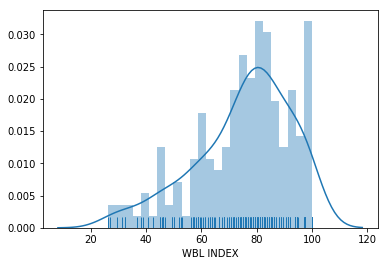

In [8]:
#histogram
hist = sns.distplot(data['WBL INDEX'], bins=25, rug=True)

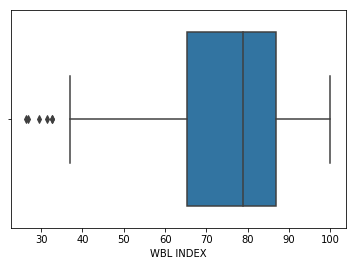

In [9]:
#boxplot
box = sns.boxplot(data['WBL INDEX'])

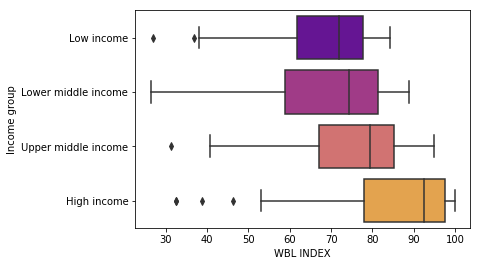

In [10]:
#boxplot by income group
boxincome = sns.boxplot(x='WBL INDEX', y='Income group', palette='plasma', data=data)


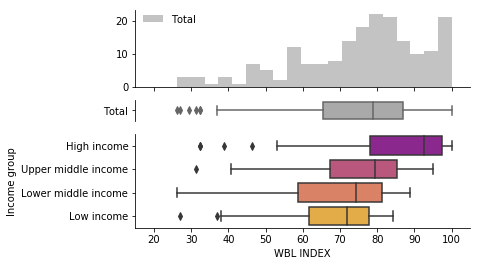

In [11]:
# combine 3 charts in one pane
sns.set_palette("plasma_r",5)

f, (hist, box, boxincome) = plt.subplots(nrows=3, sharex=True, gridspec_kw={"height_ratios": (.4, .11, .49)}, squeeze=True)
sns.distplot(data['WBL INDEX'], kde=False, bins=20, color='dimgray', ax=hist)
sns.boxplot(data['WBL INDEX'], color='darkgray', ax=box)
sns.boxplot(x=data['WBL INDEX'], y=data['Income group'], ax=boxincome)


#formatting
sns.despine()

hist.set(xlabel='')
hist.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0., labels=['Total'], frameon=False)

box.spines['bottom'].set_visible(False)
box.axes.get_xaxis().set_visible(False)
box.set(yticklabels=['Total'])

boxincome.set(xlim=(15,105))
boxincome.axes.invert_yaxis()



# Identify Outliers

The visualization shows us that there are at least 5 low-end outliers that span across all the income groups. This leads me to question which countries these outliers represent and if there is a common thead among them.

In [12]:
#display all boxplot stats for global WBL scores
box_stats = boxplot_stats(data['WBL INDEX'])
box_stats

[{'cihi': 81.25738756509139,
  'cilo': 76.3426124349086,
  'fliers': array([31.3, 32.5, 32.5, 29.4, 26.3, 26.9]),
  'iqr': 21.575000000000003,
  'mean': 75.24631578947368,
  'med': 78.8,
  'q1': 65.325,
  'q3': 86.9,
  'whishi': 100.0,
  'whislo': 36.9}]

In [13]:
#low whisker is at 36.9
#create subset of data including only the 6 outliers (WBL below low whisker value)

outliers = data[['Economy','Region','Income group','WBL INDEX','MOBILITY','WORKPLACE','MARRIAGE','PARENTHOOD','ENTREPRENEURSHIP','ASSETS','PENSION']]
outliers = outliers[outliers['WBL INDEX'] < 36.9]
outliers = pd.DataFrame.sort_values(outliers, by=['WBL INDEX'], axis=0)
outliers.index = np.arange(1, len(outliers) +1)
outliers

,Economy,Region,Income group,WBL INDEX,MOBILITY,WORKPLACE,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
1,West Bank and Gaza,Middle East & North Africa,Lower middle income,26.3,25,25,20,0,75,40,25
2,"Yemen, Rep.",Middle East & North Africa,Low income,26.9,25,25,0,0,75,40,25
3,Sudan,Sub-Saharan Africa,Lower middle income,29.4,0,0,0,20,75,40,100
4,"Iran, Islamic Rep.",Middle East & North Africa,Upper middle income,31.3,0,0,0,60,75,40,25
5,Kuwait,Middle East & North Africa,High income,32.5,50,0,20,0,75,40,75
6,Qatar,Middle East & North Africa,High income,32.5,25,0,20,0,75,40,50


In [14]:
outliers.describe()

,WBL INDEX,MOBILITY,WORKPLACE,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000
mean,29.816667,20.833333,8.333333,10.000000,13.333333,75.0,40.0,50.000000
std,2.744024,18.819316,12.909944,10.954451,24.221203,0.0,0.0,31.622777
min,26.300000,0.000000,0.000000,0.000000,0.000000,75.0,40.0,25.000000
25%,27.525000,6.250000,0.000000,0.000000,0.000000,75.0,40.0,25.000000
50%,30.350000,25.000000,0.000000,10.000000,0.000000,75.0,40.0,37.500000
75%,32.200000,25.000000,18.750000,20.000000,15.000000,75.0,40.0,68.750000
max,32.500000,50.000000,25.000000,20.000000,60.000000,75.0,40.0,100.000000


# Takeaway
It looks like there is a common thread among these 6 outliers. They all fall within the Middle East/North African region (Sudan is also in the vicinity, although technically labeled as Sub-Saharan Africa within the data). These nations also have strong cultural influences / are primarily Islamic states. The cultural values and the political atmosphere in these areas may not be conducive to employing gender equality-focused principles. It seems like this may be why even the high income nations of Kuwait and Qatar score low WBL scores.

# Saving Figures for Presentation View

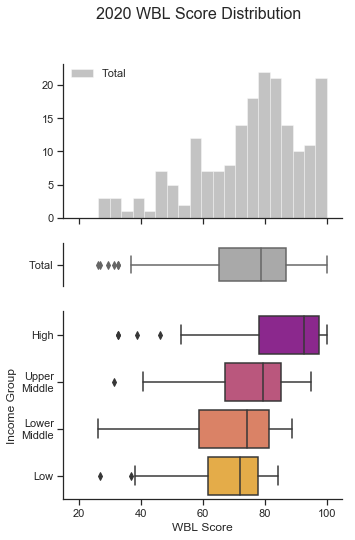

In [15]:
sns.set(rc={'figure.figsize':(5,8)})
sns.set_style("ticks")
sns.set_palette("plasma_r",5)



f, (hist, box, boxincome) = plt.subplots(nrows=3, sharex=True, gridspec_kw={"height_ratios": (.4, .11, .49)}, squeeze=True)
sns.distplot(data['WBL INDEX'], kde=False, bins=20, color='dimgray', ax=hist)
sns.boxplot(data['WBL INDEX'], color='darkgray', ax=box)
sns.boxplot(x=data['WBL INDEX'], y=data['Income group'], ax=boxincome)


#formatting
sns.despine()

hist.set(xlabel='')
hist.legend(bbox_to_anchor=(0.01, 1), loc=2, borderaxespad=0., labels=['Total'], frameon=False)

box.spines['bottom'].set_visible(False)
box.axes.get_xaxis().set_visible(False)
box.set(yticklabels=['Total'])

labels = ['Low','Lower Middle','Upper Middle','High']
labels_wrap = [fill(l, 10) for l in labels]
boxincome.set(xlim=(15,105), yticklabels=labels_wrap, ylabel='Income Group', xlabel='WBL Score')
boxincome.axes.invert_yaxis()

plt.suptitle('2020 WBL Score Distribution',fontsize= 16)

#save figure
plt.savefig(fname='2020 WBL by Income Group', bbox_inches='tight')


In [16]:
#calculate metrics to include on slide

print('Mean WBL: ', data["WBL INDEX"].mean())
print('Median WBL: ', data["WBL INDEX"].median())
print('Max WBL: ', data["WBL INDEX"].max())
print('Min WBL: ', data["WBL INDEX"].min())


Mean WBL:  75.24631578947357
Median WBL:  78.8
Max WBL:  100.0
Min WBL:  26.3
